# Movie Dialog Corpus
The basic aim of this project is we have to predict the gender of character based on there dialog.
#### Procedure:
1. Data reading and building full data 
2. Data cleanig
3. Exploratory data analysis
4. Feature selection and Feature engineering
5. Model building and selection

Please refere below link for data set and there information:

https://www.kaggle.com/Cornell-University/movie-dialog-corpus


## Importing basic library

In [1]:
import pandas as pd              #Pandas is used to analyze data.
import numpy as np               #Numpy is used for mathematical and logical operations on arrays can be performed.
import matplotlib.pyplot as plt  #its used for data visualization 
import seaborn as sns            #its used for data visualization 
import warnings                  #its used for filterout the warnings     
warnings.filterwarnings('ignore')

### importing  the data

In [2]:
#Reading all the data and assigning to variable
movie_line=pd.read_csv('movie_lines.tsv',sep='\t',error_bad_lines=False,warn_bad_lines=False, header=None)
movie_characters=pd.read_csv('movie_characters_metadata.tsv',sep='\t',error_bad_lines=False,warn_bad_lines=False, header=None)
movie_titles=pd.read_csv('movie_titles_metadata.tsv',sep='\t',error_bad_lines=False,warn_bad_lines=False, header=None)


Now we done the reading part ,Lets exploer each data set 

In [3]:
#Checking top 5 data from movie_characters
movie_characters.head()

,0,1,2,3,4,5
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [4]:
#Assigning the column name  as column name are in no. so with name we get clear information
movie_characters.columns=['chId','chName','mId','mName','gender','posCredits']
#checking top 5 data from movie_characters with updated column name
movie_characters.head()

,chId,chName,mId,mName,gender,posCredits
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [5]:
#checking gender column to get gender information
movie_characters['gender'].value_counts()

?    6008
m    1899
f     921
M     145
F      44
Name: gender, dtype: int64

As you can see there is '?' in gender column so its is missing or incorrect data 
. 
We don't select this row where gender = ?

In [6]:
movie_characters['gender'].value_counts()

?    6008
m    1899
f     921
M     145
F      44
Name: gender, dtype: int64

In [7]:
movie_line.head()

,0,1,2,3,4
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [8]:
##Assigning the column name  as column name are in no. so with name we get clear information
movie_line.columns = ['lineId','chId','mId','chName','dialogue']
#checking top 5 data from movie_line with updated column name
movie_line.head()

,lineId,chId,mId,chName,dialogue
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


Now both data set clean with name so we can combine both data into single data set

In [9]:
movie_line_char= pd.merge(movie_line, movie_characters, how='inner', on=['chId','mId', 'chName'],
         left_index=False, right_index=False, sort=True,copy=False, indicator=False)
#checking top 5 data from movie_line with updated column name
movie_line_char.head()

,lineId,chId,mId,chName,dialogue,mName,gender,posCredits
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,f,4
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,f,4
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,f,4
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,f,4
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,f,4


In [10]:
movie_titles.head()

,0,1,2,3,4,5
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


In [11]:
##Assigning the column name  as column name are in no. so with name we get clear information
movie_titles.columns = ['mId','mName','releaseYear','rating','votes','genres']
#checking top 5 data from movie_line with updated column name

movie_titles.head()

,mId,mName,releaseYear,rating,votes,genres
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


In [12]:
movie_line_char_title = pd.merge(movie_line_char, movie_titles, how='inner', on=['mId'],
         left_index=False, right_index=False, sort=True,copy=False, indicator=False)
#checking top 5 data from movie_line_char_title 
movie_line_char_title.head()

,lineId,chId,mId,chName,dialogue,mName_x,gender,posCredits,mName_y,releaseYear,rating,votes,genres
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,f,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,f,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,f,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,f,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,f,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']


In [13]:
movie_line_char_title['lineLength'] = movie_line_char_title.dialogue.str.len()             
movie_line_char_title['wordCountLine'] = movie_line_char_title.dialogue.str.count(' ') + 1 
movie_line_char_title.head()

,lineId,chId,mId,chName,dialogue,mName_x,gender,posCredits,mName_y,releaseYear,rating,votes,genres,lineLength,wordCountLine
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,f,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],12.0,3.0
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,f,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],10.0,3.0
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,f,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],9.0,2.0
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,f,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],46.0,10.0
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,f,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],32.0,6.0


## Data cleaning

As you can see there is '?' in gender column so its is missing or incorrect data 


In [14]:
movie_line_char_title['gender'].value_counts()

m    146034
f     63295
?     59138
M     15401
F      4579
Name: gender, dtype: int64

We don't select this row where gender = ?

In [15]:
#selecting only row where gender not equqal to ?
movie_line_char_title=movie_line_char_title[movie_line_char_title['gender'] != '?']


In [16]:
#To see the correct data
movie_line_char_title['gender'].value_counts()

m    146034
f     63295
M     15401
F      4579
Name: gender, dtype: int64

Now we Converting gender in tarms of no.and we assign Female to 0 and Male to 1

In [17]:
movie_line_char_title['gender']=movie_line_char_title['gender'].apply(lambda g: 0 if g in ['f','F'] else 1)
movie_line_char_title.head()

,lineId,chId,mId,chName,dialogue,mName_x,gender,posCredits,mName_y,releaseYear,rating,votes,genres,lineLength,wordCountLine
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,0,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],12.0,3.0
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,0,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],10.0,3.0
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,0,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],9.0,2.0
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,0,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],46.0,10.0
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,0,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],32.0,6.0


In [18]:
movie_line_char_title['gender'].value_counts()

1    161435
0     67874
Name: gender, dtype: int64

#### Checking Null value in full data set

##### There is some NaN value present in data so we have to remove.

In [19]:
#isnull function used to get the null value and sum() used to add all null value for that particular row
movie_line_char_title.isnull().sum()


lineId             0
chId               0
mId                0
chName             0
dialogue         203
mName_x            0
gender             0
posCredits         0
mName_y            0
releaseYear        0
rating             0
votes              0
genres             0
lineLength       203
wordCountLine    203
dtype: int64

#### Now we can see above dialogue,lineLength,wordCountLine column we have 203 null value so we have to delete this value

In [20]:
#Assigining df to non null value and dropna() function used for deleting the null value row
df=movie_line_char_title.dropna() 

In [21]:
#checking top 5 data from df
df.head()

,lineId,chId,mId,chName,dialogue,mName_x,gender,posCredits,mName_y,releaseYear,rating,votes,genres,lineLength,wordCountLine
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,0,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],12.0,3.0
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,0,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],10.0,3.0
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,0,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],9.0,2.0
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,0,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],46.0,10.0
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,0,4,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],32.0,6.0


##### In dialogue there is lots of unwanted word like (-, . , :, to , or , a  etc.) that will not help for feature so we just remove those things

In [22]:
#Below are library used for text cleaning process
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

wordnet_lemmatizer = WordNetLemmatizer()
def clean_dialogue( dialogue ):
  
    #  Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", dialogue) 
    #
    # Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    #  In Python, searching a set is much faster than searching a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))   
    
    # Use lemmatization and remove stop words
    meaningful_words = [wordnet_lemmatizer.lemmatize(w) for w in words if not w in stops]   
    #
    # Join the words back into one string separated by space and return the result.
    return( " ".join( meaningful_words ))

df['cleaned_dialogue'] = df['dialogue'].apply(clean_dialogue)
df[['cleaned_dialogue','dialogue']].head()

,cleaned_dialogue,dialogue
0,,They do not!
1,hope,I hope so.
2,let go,Let's go.
3,okay gonna need learn lie,Okay -- you're gonna need to learn how to lie.
4,like fear wearing pastel,Like my fear of wearing pastels?


Now, we can aggregate all data for a particular movie character into 1 record. We will combine their dialogue tokens from the entire movie, calculate their median dialogue length by characters & words, and count their total no of lines in the movie.

In [23]:

final_data = df.groupby(['chId', 'mId', 'chName', 'gender', 'posCredits','releaseYear']). \
            agg({'lineLength' : ['median'], 
                 'wordCountLine' : ['median'],
                 'chId' : ['count'],
                 'cleaned_dialogue' : [lambda x : ' '.join(x)]
                })

## Renaming columns by aggregate functions
final_data.columns = ["_".join(x) for x in final_data.columns.ravel()]
final_data.reset_index(inplace=True)


In [24]:
final_data.head()

,chId,mId,chName,gender,posCredits,releaseYear,lineLength_median,wordCountLine_median,chId_count,cleaned_dialogue_<lambda>
0,u0,m0,BIANCA,0,4,1999,34.0,7.0,94,hope let go okay gonna need learn lie like fe...
1,u100,m6,AMY,0,7,1999,23.0,4.0,31,died sleep three day ago paper tom dead calli...
2,u1003,m65,RICHARD,1,3,1996,24.5,5.0,70,asked would said room room serious foolin arou...
3,u1005,m65,SETH,1,2,1996,37.0,8.0,163,let follow said new jesus christ carlos brothe...
4,u1008,m66,C.O.,1,17,1997,48.0,9.0,33,course uh v p security arrangement generally t...


##  Ploating some Feature distributions 

<AxesSubplot:xlabel='lineLength_median', ylabel='Count'>

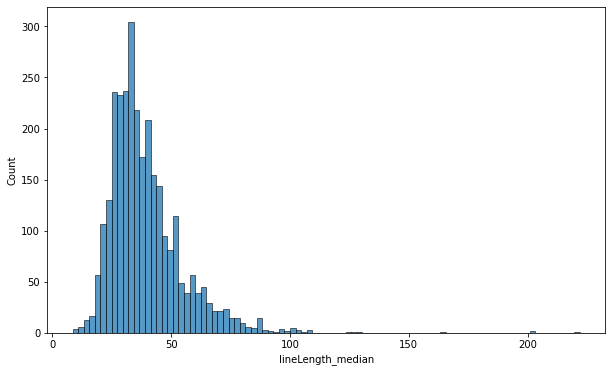

In [25]:
#We ploating the dialogue lenght to know how this line distributed

plt.figure(figsize=(10,6))                    #To set the figure size
sns.histplot(final_data['lineLength_median']) #Histogram ploated for length of each line 

From above observation we can see that mostly line are between 10 to 50 range

<AxesSubplot:xlabel='gender', ylabel='lineLength_median'>

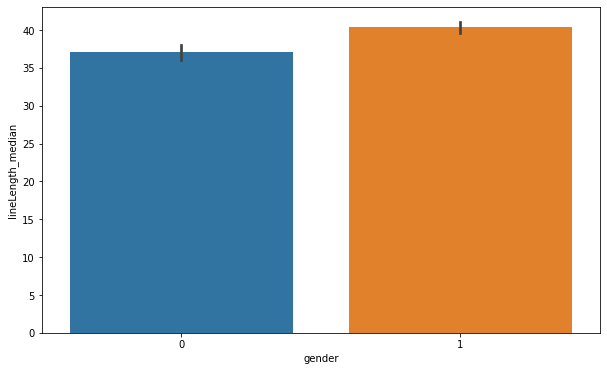

In [26]:
# We ploating the barplot between gender vs linelength

plt.figure(figsize=(10,6))                    #To set the figure size
sns.barplot(x=final_data['gender'],y=final_data['lineLength_median'],data=final_data)

we can see that above almost equally distributed line length between male and female 

<AxesSubplot:xlabel='gender', ylabel='count'>

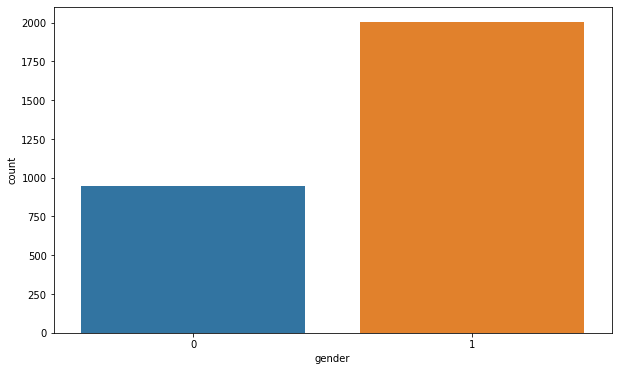

In [27]:
# Count plot for gender column to get the no. of count 
plt.figure(figsize=(10,6))                    #To set the figure size

sns.countplot(x=final_data['gender'])

<AxesSubplot:xlabel='gender', ylabel='chId_count'>

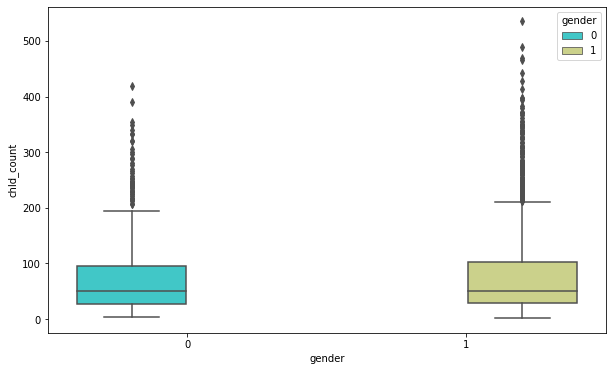

In [28]:
#We ploating Boxplot between gender vs chid count  
plt.figure(figsize=(10,6))                    #To set the figure size
#palette use for colouring purpose 
sns.boxplot(data = final_data, x = 'gender', y = 'chId_count', hue = 'gender',palette='rainbow')


<AxesSubplot:xlabel='gender', ylabel='wordCountLine_median'>

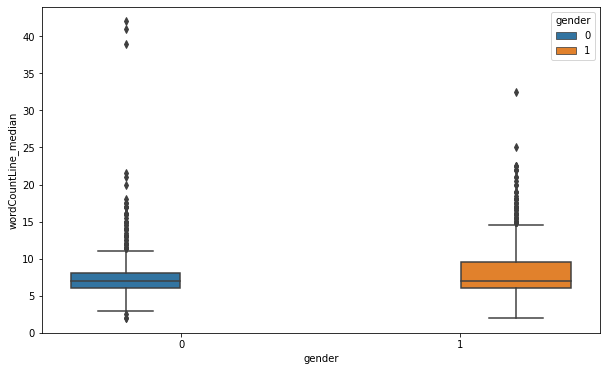

In [29]:
plt.figure(figsize=(10,6))                    #To set the figure size

sns.boxplot(data = final_data, x = 'gender', y = 'wordCountLine_median', hue = 'gender')


<AxesSubplot:xlabel='gender', ylabel='lineLength_median'>

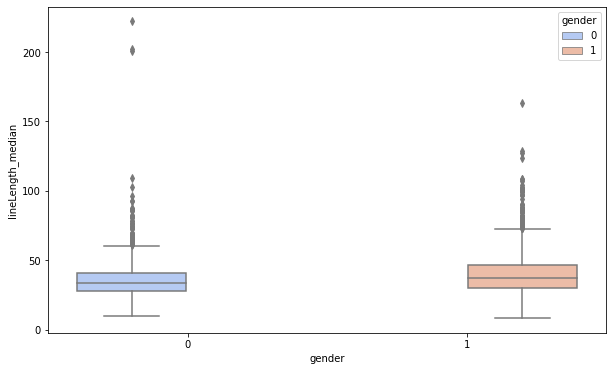

In [30]:
plt.figure(figsize=(10,6))                    #To set the figure size

sns.boxplot(data = final_data, x = 'gender', y = 'lineLength_median', hue = 'gender',palette="coolwarm")


<AxesSubplot:xlabel='wordCountLine_median', ylabel='chId_count'>

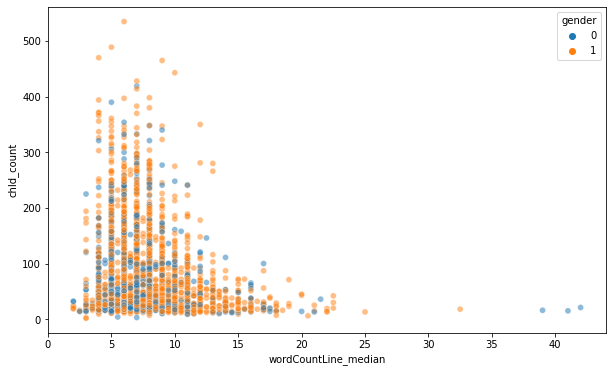

In [31]:
plt.figure(figsize=(10,6))                    #To set the figure size

sns.scatterplot(data = final_data, x = 'wordCountLine_median', y = 'chId_count', hue = 'gender', alpha = 0.5)

<AxesSubplot:>

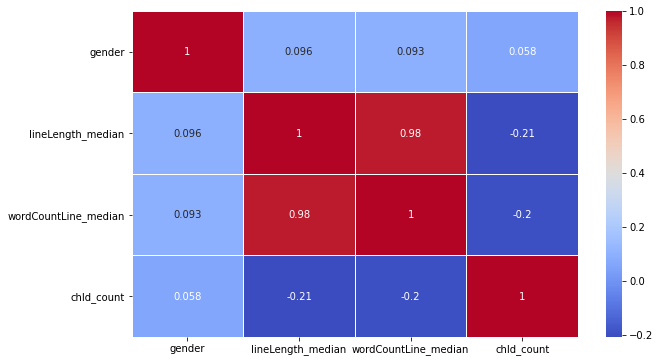

In [32]:
#Heatmap is used for to get the all column correlation 
# Toward 1 means heighly correlated and toward 0 mens less coreelated 
plt.figure(figsize=(10,6)) 
#cmap use for color purpose and annot use for to get the no. in box
sns.heatmap(final_data.corr(),cmap='coolwarm',annot=True,linecolor='white',linewidths=1)

## Model training and selection

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction

In [33]:
# train test split use for spliting the data into train and test part
from sklearn.model_selection import train_test_split
#TfidfVectorizer is used for converting text into no. formate
from sklearn.feature_extraction.text import TfidfVectorizer
#accuracy_score,confusion_matrix is used for checking accuracy of the model
from sklearn.metrics import accuracy_score,confusion_matrix

#### Train and test split of the data

In [34]:
x_train,x_test,y_train,y_test=train_test_split(final_data['cleaned_dialogue_<lambda>'],final_data['gender'], test_size=0.2, random_state=101)


In [35]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

### LOGISTIC REGRESSION


In [36]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(tfidf_train,y_train)

LogisticRegression()

In [37]:
# Predicting the test set
y_pred=lg.predict(tfidf_test)

In [38]:
#making confusion matrix and calculatin accuracy score
mylist=[] #its used to store all type model accuracy
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
mylist.append(ac)
print(ac)
print(cm)

0.739424703891709
[[ 41 138]
 [ 16 396]]


### K NEAREST NEIGHBOR


In [39]:
from sklearn.neighbors import KNeighborsClassifier
# Finding the optimum number of neighbors 
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(tfidf_train,y_train)
    pred_i = knn.predict(tfidf_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

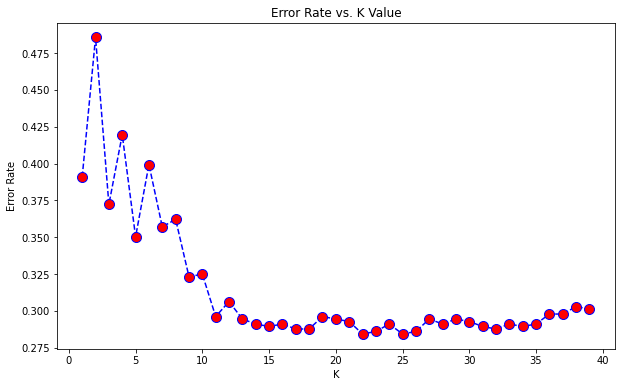

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

for 15 we get min error

In [41]:
# Training the K Nearest Neighbor Classifier at 15 value

classifier=KNeighborsClassifier(n_neighbors=15)
classifier.fit(tfidf_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [42]:
# Predicting the Test set results
y_pred = classifier.predict(tfidf_test)


In [43]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[ 40 139]
 [ 32 380]]
0.7106598984771574


### DECISION TREE CLASSIFIER

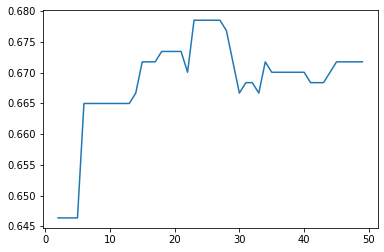

In [44]:

# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,50):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(tfidf_train, y_train)
    y_pred = classifier.predict(tfidf_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,50)), list1)
plt.show()

In [45]:
# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 22 ,random_state=0, criterion='entropy')
classifier.fit(tfidf_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=22, random_state=0)

In [46]:
# Predicting the test set results
y_pred = classifier.predict(tfidf_test)


In [47]:
# Making the confusion matrix and calculating accuracy score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[ 47 132]
 [ 63 349]]
0.6700507614213198


### RANDOM FOREST CLASSIFCATION

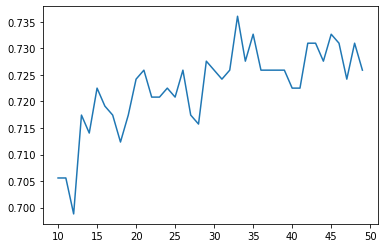

In [48]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
list1 = []
for estimators in range(10,50):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(tfidf_train, y_train)
    y_pred = classifier.predict(tfidf_test)
    list1.append(accuracy_score(y_test,y_pred))

plt.plot(list(range(10,50)), list1)
plt.show()

In [49]:
# Training the RandomForest Classifier 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion='entropy', random_state=0)
classifier.fit(tfidf_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [50]:
# Predicting the test set results
y_pred = classifier.predict(tfidf_test)


In [51]:
# Making the confusion matrix and calculating the accuracy score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[ 48 131]
 [ 32 380]]
0.7241962774957699


### XGboost Classifier

In [52]:

from xgboost import XGBClassifier
classifier = XGBClassifier(objective='binary:logistic')
classifier.fit(tfidf_train,y_train)

[10:55:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
y_pred = classifier.predict(tfidf_test)


In [54]:
# Making the confusion matrix and calculating the accuracy score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[ 69 110]
 [ 37 375]]
0.751269035532995


In [55]:
# Plotting accuracy score of different models
mylist

[0.739424703891709,
 0.7106598984771574,
 0.6700507614213198,
 0.7241962774957699,
 0.751269035532995]

In [56]:
mylist2 = ["Logistic Regression", "KNearestNeighbours","DecisionTree","RandomForest", "XGBOOST"]


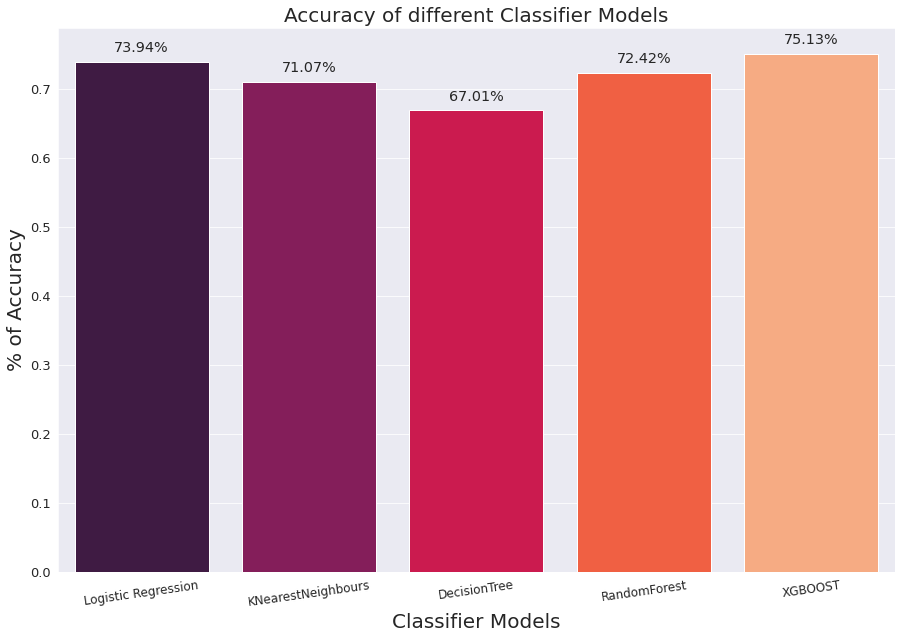

In [57]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

### Hence we can conclude that from all above classifier models the XGBOOST perform the best with accuarcy of 75.13%